In [17]:
import numpy as np
from constant import *
from utils import *
import matplotlib.pyplot as plt


In [18]:
def euler_one_step(S,I_moins,I_plus,R_moins,R_plus_I,H,U,R_plus_H,D,D_R,i,cst):
    S_1        = S-cst['tau'][i]*S*I_moins*deltaT
    I_moins_1  = I_moins + (cst['tau'][i]*S*I_moins-cst['lambda_1']*I_moins-(cst['gamma_IR']+cst['gamma_IH']+cst['gamma_IU'])*I_moins)*deltaT
    I_plus_1   = I_plus +(cst['lambda_1']*I_moins-(cst['gamma_IR']+cst['gamma_IH']+cst['gamma_IU'])*I_plus)*deltaT
    R_moins_1  = R_moins +(cst['gamma_IR']*I_moins-cst['lambda_2']*R_moins)*deltaT
    R_plus_I_1 = R_plus_I + (cst['gamma_IR']*I_plus+cst['lambda_2']*R_moins)*deltaT
    H_1        = H + (cst['gamma_IH']*(I_moins + I_plus)-(cst['gamma_HR']+cst['gamma_HD']+cst['gamma_HU'])*H)*deltaT
    U_1        = U + (cst['gamma_IU']*(I_moins + I_plus)+cst['gamma_HU']*H-(cst['gamma_UR'] + cst['gamma_UD'])*U)*deltaT
    R_plus_H_1 = R_plus_H+ (cst['gamma_HR']*H+cst['gamma_UR']*U)*deltaT
    D_1        = D + (cst['gamma_UD']*U+cst['gamma_HD']*H)*deltaT  
    D_R_1      = D_R +((cst['lambda_1']+cst['gamma_IH']+cst['gamma_IU'])*I_moins-D_R)*deltaT
    
    
    return(S_1,I_moins_1,I_plus_1,R_moins_1,R_plus_I_1,H_1,U_1,R_plus_H_1,D_1,D_R_1)


def resolution_systeme(set_size, deltaT,cst):
    Res = np.zeros((N_VARIABLE,set_size))
    Res[0,0] = cst['S_0'] 
    Res[1,0] = cst['I_moins_0']
    
    for i in range(1,set_size):
        Res[:,i] = euler_one_step(Res[0,i-1],Res[1,i-1],Res[2,i-1],Res[3,i-1],Res[4,i-1],Res[5,i-1],Res[6,i-1],Res[7,i-1],Res[8,i-1],Res[9,i-1],i,cst)
 
    return Res


In [3]:
def Monte_Carlo(M):
    peak_value,peak_day, pos = [],[], []
    
    for i in range(M):
        cst = init_constant()
        try : 
            results = resolution_systeme(set_size,deltaT,cst)
            peak_value.append(np.max(results[6,:]))
            peak_day.append(int(np.argmax(list(results[6,:]))*deltaT))
            pos.append(np.max(results[2,:]))
        except:
            print(f"Try n°{i} failed")
    return peak_value,peak_day, pos
    

In [4]:
a = Monte_Carlo(10000)

In [5]:
peak_value,peak_day, pos = a[0],a[1],a[2]

In [6]:
peak_value=np.array(peak_value)
peak_day  =np.array(peak_day)
pos = np.array(pos)

(array([6.075e+03, 7.770e+02, 4.200e+02, 2.590e+02, 2.240e+02, 1.920e+02,
        1.570e+02, 1.230e+02, 1.340e+02, 1.080e+02, 9.800e+01, 1.010e+02,
        8.000e+01, 8.700e+01, 6.800e+01, 6.800e+01, 5.400e+01, 5.800e+01,
        5.300e+01, 5.200e+01, 5.300e+01, 4.500e+01, 3.100e+01, 3.700e+01,
        4.400e+01, 3.100e+01, 2.800e+01, 3.400e+01, 3.400e+01, 2.500e+01,
        1.500e+01, 3.300e+01, 1.800e+01, 2.300e+01, 2.200e+01, 1.800e+01,
        2.700e+01, 2.200e+01, 2.000e+01, 1.500e+01, 1.900e+01, 1.500e+01,
        1.400e+01, 1.300e+01, 1.000e+01, 1.200e+01, 6.000e+00, 9.000e+00,
        1.000e+01, 1.100e+01, 4.000e+00, 6.000e+00, 1.000e+01, 9.000e+00,
        6.000e+00, 1.000e+00, 3.000e+00, 4.000e+00, 4.000e+00, 6.000e+00,
        6.000e+00, 3.000e+00, 8.000e+00, 5.000e+00, 4.000e+00, 2.000e+00,
        2.000e+00, 3.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 5.000e+0

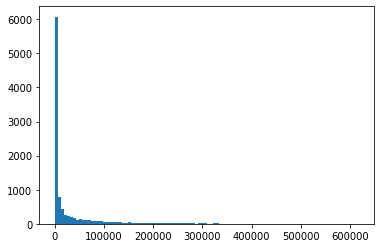

In [7]:
plt.hist(peak_value,bins = 100)

(array([  1.,   1.,   4.,   0.,   2.,   4.,  12.,   0.,   9.,  13.,   0.,
         30.,  25.,  35.,   0.,  39.,  51.,   0.,  62.,  62.,  61.,   0.,
         96.,  95.,   0.,  92., 122., 118.,   0., 112., 143., 143.,   0.,
        168., 170.,   0., 170., 176., 211.,   0., 174., 221.,   0., 211.,
        185., 211.,   0., 206., 231.,   0., 254., 259., 260.,   0., 270.,
        261., 242.,   0., 246., 235.,   0., 222., 209., 248.,   0., 218.,
        190.,   0., 193., 181., 181.,   0., 193., 160.,   0., 166., 126.,
        124.,   0., 145., 120., 122.,   0.,  92.,  89.,   0.,  84.,  93.,
         81.,   0.,  63.,  74.,   0.,  67.,  58.,  58.,   0.,  58.,  59.,
        633.]),
 array([27.  , 27.72, 28.44, 29.16, 29.88, 30.6 , 31.32, 32.04, 32.76,
        33.48, 34.2 , 34.92, 35.64, 36.36, 37.08, 37.8 , 38.52, 39.24,
        39.96, 40.68, 41.4 , 42.12, 42.84, 43.56, 44.28, 45.  , 45.72,
        46.44, 47.16, 47.88, 48.6 , 49.32, 50.04, 50.76, 51.48, 52.2 ,
        52.92, 53.64, 54.36, 55.08

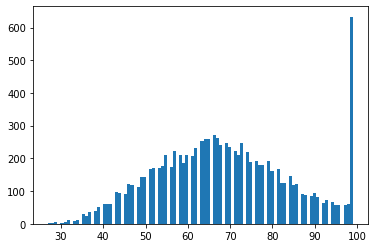

In [8]:

plt.hist(peak_day,bins = 100)

(array([5.795e+03, 7.810e+02, 4.420e+02, 3.020e+02, 2.520e+02, 1.820e+02,
        1.850e+02, 1.500e+02, 1.220e+02, 1.040e+02, 8.900e+01, 8.500e+01,
        7.900e+01, 8.400e+01, 6.900e+01, 6.100e+01, 5.800e+01, 5.700e+01,
        5.100e+01, 6.200e+01, 5.000e+01, 5.700e+01, 4.000e+01, 3.000e+01,
        3.100e+01, 3.300e+01, 2.700e+01, 2.300e+01, 3.500e+01, 2.400e+01,
        2.900e+01, 3.000e+01, 2.200e+01, 2.800e+01, 3.000e+01, 2.700e+01,
        2.800e+01, 1.800e+01, 1.800e+01, 2.000e+01, 2.100e+01, 1.800e+01,
        1.700e+01, 2.700e+01, 1.600e+01, 1.400e+01, 1.400e+01, 1.400e+01,
        2.200e+01, 1.800e+01, 1.200e+01, 1.200e+01, 1.200e+01, 1.000e+01,
        6.000e+00, 1.200e+01, 6.000e+00, 4.000e+00, 1.200e+01, 1.000e+01,
        1.000e+01, 3.000e+00, 7.000e+00, 4.000e+00, 1.000e+01, 5.000e+00,
        1.000e+01, 7.000e+00, 4.000e+00, 6.000e+00, 3.000e+00, 2.000e+00,
        2.000e+00, 2.000e+00, 2.000e+00, 7.000e+00, 7.000e+00, 3.000e+00,
        0.000e+00, 3.000e+00, 1.000e+0

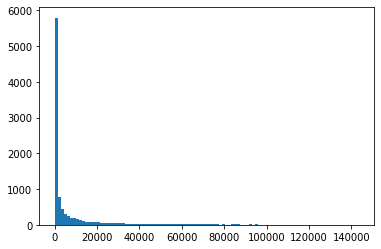

In [9]:
plt.hist(pos,bins = 100)

In [10]:
max(pos)

143528.30384607782

In [11]:
deltaT

0.1

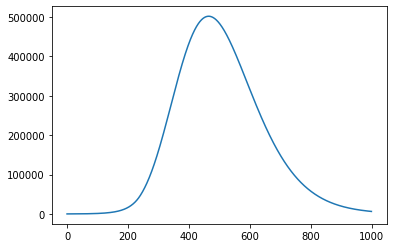

In [12]:
cst = init_constant()
results = resolution_systeme(set_size,deltaT,cst)

plt.plot(results[1,:])



In [16]:
peak_value.mean()

30751.685706326418